1] Libraries & Data Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("listings.csv", error_bad_lines=False)


<ipython-input-5-cfc041370225>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("listings.csv", error_bad_lines=False)
Skipping line 244: expected 92 fields, saw 152
Skipping line 707: expected 92 fields, saw 101



Check the content of the DataFrame

In [6]:
df.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
986,4593740,https://www.airbnb.com/rooms/4593740,20160104002432,2016-01-04,Great Downtown Home! 98 Walkscore,"Between Pike Place Market & Pioneer Square, & ...","Fully furnished one bedroom, one full bath, 60...","Between Pike Place Market & Pioneer Square, & ...",none,Perfect for walking anywhere in the downtown S...,...,10.0,f,NaN,WASHINGTON,t,strict,f,f,2.0,6.37
2115,8755762,https://www.airbnb.com/rooms/8755762,20160104002432,2016-01-04,Newly Listed Historic Designed Flat,Newly listed Capitol Hill location with charm ...,Thoughtfully designed and well traveled charm ...,Newly listed Capitol Hill location with charm ...,none,Capitol Hill is the most thriving neighborhood...,...,9.0,f,NaN,WASHINGTON,t,flexible,f,f,1.0,9.00


How many rows and columns are there?


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3100 non-null   int64  
 1   listing_url                       3100 non-null   object 
 2   scrape_id                         3100 non-null   int64  
 3   last_scraped                      3100 non-null   object 
 4   name                              3100 non-null   object 
 5   summary                           2954 non-null   object 
 6   space                             2656 non-null   object 
 7   description                       3100 non-null   object 
 8   experiences_offered               3100 non-null   object 
 9   neighborhood_overview             2277 non-null   object 
 10  notes                             1812 non-null   object 
 11  transit                           2355 non-null   object 
 12  thumbn

3] Data Wrangling (Cleaning & Manipulation)

Drop unnecessary columns

In [8]:
df=df[["neighbourhood","latitude","longitude","price","minimum_nights","availability_365","room_type","calculated_host_listings_count"]]


Examining Changes

In [9]:
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,availability_365,room_type,calculated_host_listings_count
0,Queen Anne,47.636289038357184,-122.37102519997765,$85.00,1.0,346.0,Entire home/apt,2.0
1,Queen Anne,47.63912312136253,-122.36566646439582,$150.00,2.0,291.0,Entire home/apt,6.0
2,Queen Anne,47.629724131577355,-122.3694831756176,$975.00,4.0,220.0,Entire home/apt,2.0
3,Queen Anne,47.638473201766416,-122.36927912263018,$100.00,1.0,143.0,Entire home/apt,1.0
4,Queen Anne,47.63291840276724,-122.37247063402224,$450.00,1.0,365.0,Entire home/apt,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   2762 non-null   object 
 1   latitude                        3100 non-null   object 
 2   longitude                       3100 non-null   object 
 3   price                           3099 non-null   object 
 4   minimum_nights                  3099 non-null   float64
 5   availability_365                3099 non-null   float64
 6   room_type                       3099 non-null   object 
 7   calculated_host_listings_count  3099 non-null   float64
dtypes: float64(3), object(5)
memory usage: 193.9+ KB


Are there any missing / duplicated data?


In [11]:
df.duplicated().value_counts()

False    3100
dtype: int64

In [12]:
df = df.drop_duplicates()


In [13]:
df.isna().sum()


neighbourhood                     338
latitude                            0
longitude                           0
price                               1
minimum_nights                      1
availability_365                    1
room_type                           1
calculated_host_listings_count      1
dtype: int64

4] Data Analysis & Visualization (EDA & Statistical Analysis)

Examine Continous Variables

In [14]:
df.describe()


,minimum_nights,availability_365,calculated_host_listings_count
count,3099.000000,3099.000000,3099.000000
mean,2.433366,244.480478,2.778961
std,18.066506,126.980516,5.424212
min,1.000000,0.000000,1.000000
25%,1.000000,124.500000,1.000000
50%,2.000000,308.000000,1.000000
75%,2.000000,359.000000,2.000000
max,1000.000000,365.000000,37.000000


In [15]:
df.describe(include=['object', 'bool'])


,neighbourhood,latitude,longitude,price,room_type
count,2762,3100,3100,3099,3099
unique,80,3100,3100,262,3
top,Capitol Hill,47.636289038357184,-122.37102519997765,$150.00,Entire home/apt
freq,349,1,1,136,2077


Get Correlation between different variables

<ipython-input-16-5085733725d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

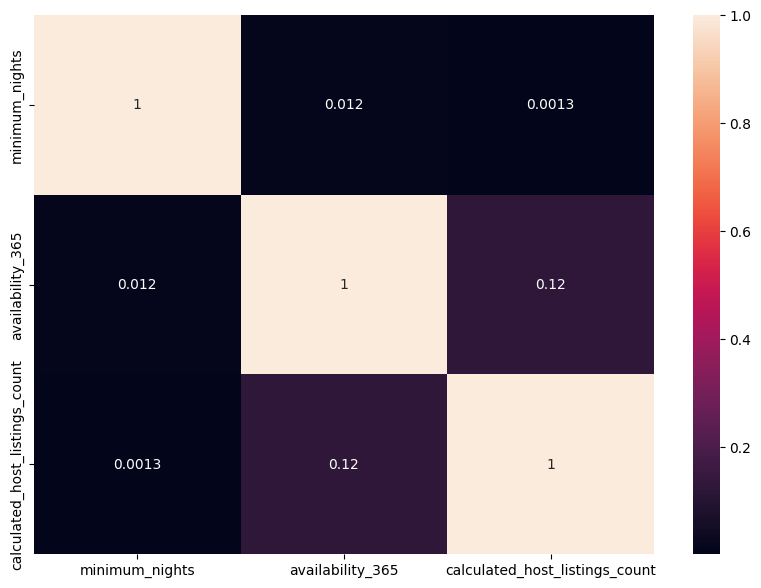

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

Multivariate visualization

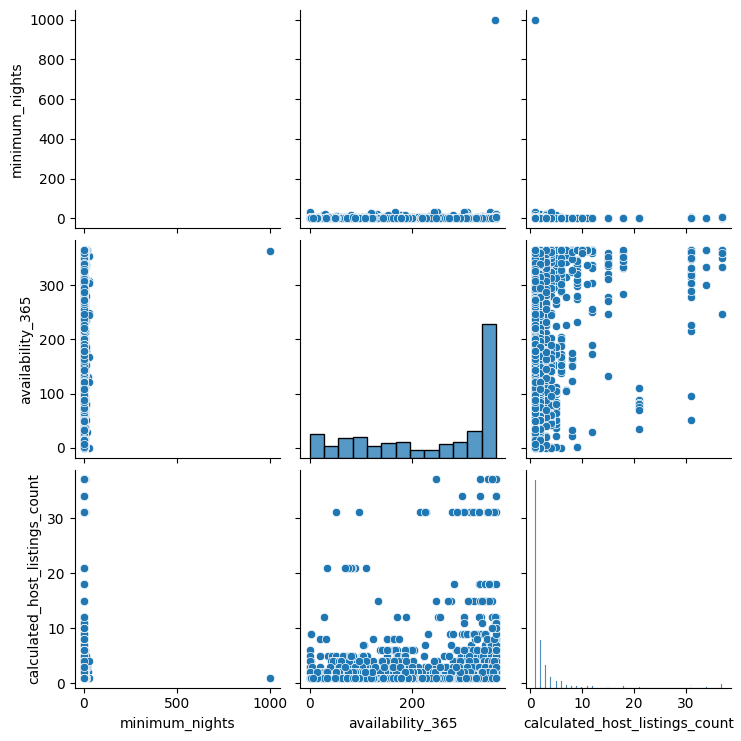

In [17]:
sns.pairplot(df)


Neighbourhood

In [18]:
df["neighbourhood"].value_counts()


Capitol Hill             349
Ballard                  213
Belltown                 204
Queen Anne               156
Fremont                  148
                        ... 
Pike Market                1
Roxhill                    1
Westlake                   1
Harrison/Denny-Blaine      1
North College Park         1
Name: neighbourhood, Length: 80, dtype: int64

In [19]:
df["neighbourhood"].unique()


array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Magnolia', 'Belltown',
       'South Lake Union', 'Central Business District',
       'Pike Place Market', 'Wallingford', 'Green Lake',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pike Market', 'Capitol Hill', 'Pioneer Square', 'Gatewood',
       'The Junction', 'Arbor Heights', 'Alki', 'North Admiral',
       'Crown Hill', 'Genesee', 'Fairmount Park', 'Interbay',
       'Industrial District', 'North Beacon Hill', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'Leschi', 'Atlantic',
       'North Delridge', 'Maple Leaf', 'Bryant', 'Ravenna',
       'University District', 'Wedgewood', 'Riverview', 'Portage Bay',
       'Eastlake', 'Montlak

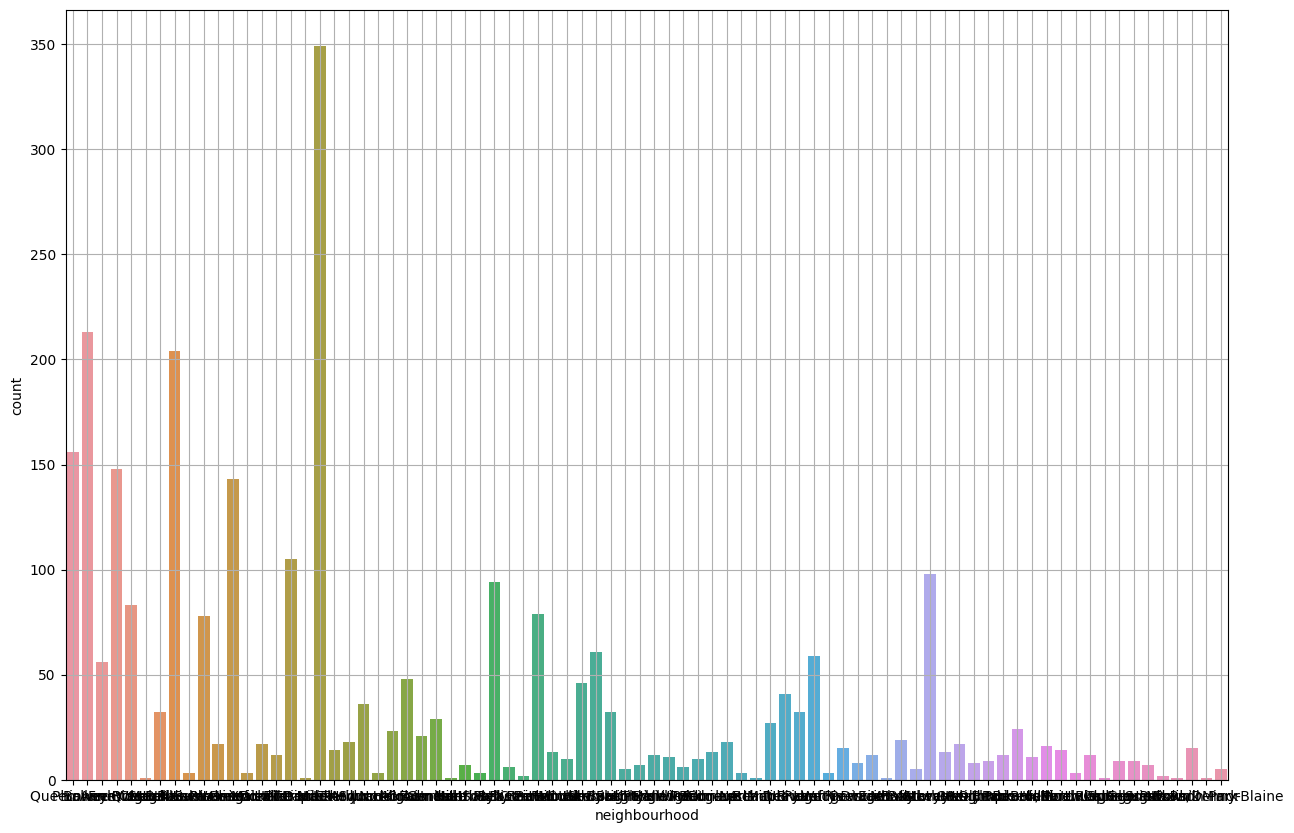

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x='neighbourhood', data=df)
plt.grid()
plt.show()

Room type

In [21]:

df["room_type"].value_counts()


Entire home/apt    2077
Private room        925
Shared room          97
Name: room_type, dtype: int64

In [22]:
df["room_type"].unique()


array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

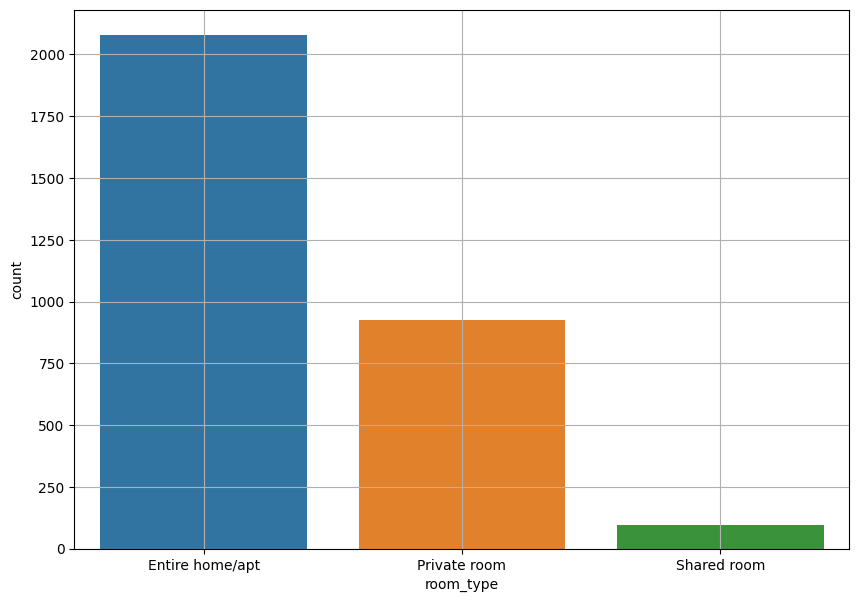

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='room_type', data=df)
plt.grid()
plt.show()


calculated host listings count

In [24]:
df["calculated_host_listings_count"].value_counts()


1.0     2000
2.0      459
3.0      215
4.0      105
6.0       62
5.0       59
31.0      35
37.0      31
7.0       21
9.0       19
18.0      18
8.0       16
15.0      16
12.0      12
11.0      12
21.0      10
34.0       6
10.0       3
Name: calculated_host_listings_count, dtype: int64

In [25]:
df["calculated_host_listings_count"].unique()


array([ 2.,  6.,  1.,  5.,  8.,  3., 31.,  4., 12., nan,  7., 37.,  9.,
       11., 21., 34., 15., 18., 10.])

<Axes: >

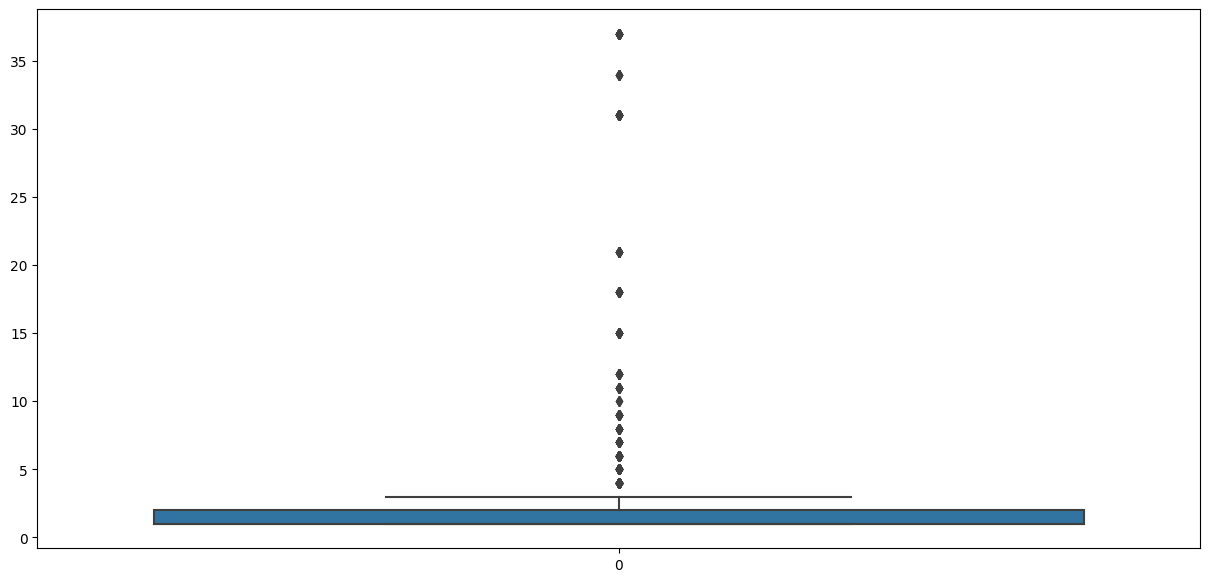

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(df['calculated_host_listings_count'])

The relation between price and calculated host listings count


In [ ]:
sns.jointplot(x='calculated_host_listings_count', y='price', data=df, kind='scatter')


The relation between price, calculated host listings count and room type


In [28]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


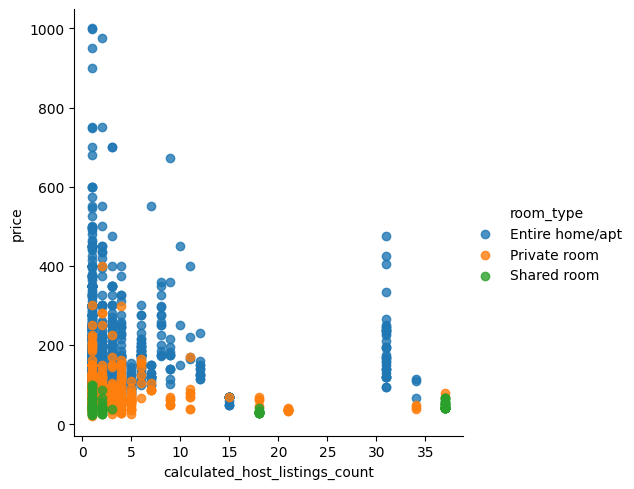

In [29]:
sns.lmplot(x='calculated_host_listings_count', y='price', data=df, hue='room_type', fit_reg=False)


The relation between price and availability of room


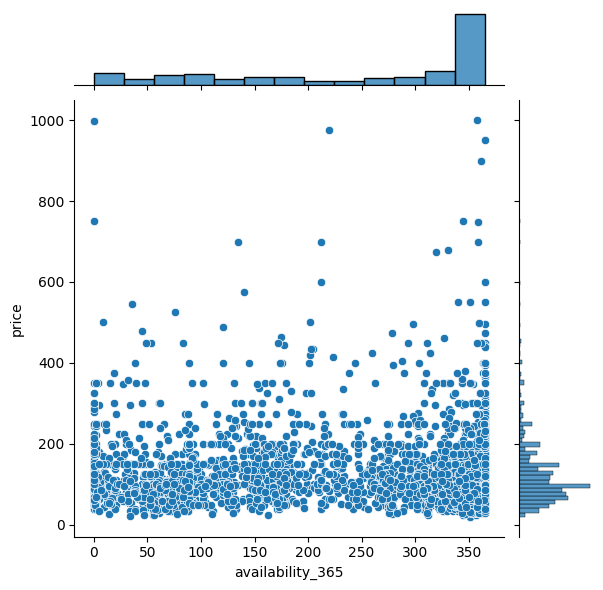

In [30]:
sns.jointplot(x='availability_365', y='price', data=df, kind='scatter')


The relation between price, availability of room and room type


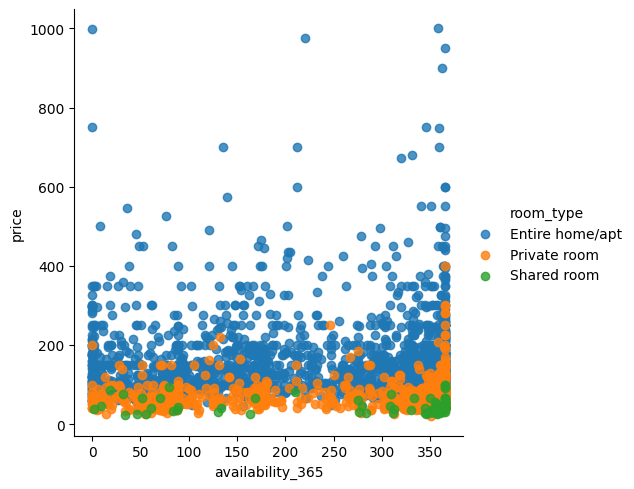

In [31]:
sns.lmplot(x='availability_365', y='price', data=df, hue='room_type', fit_reg=False)


The relation between minimum nights and calculated host listings count


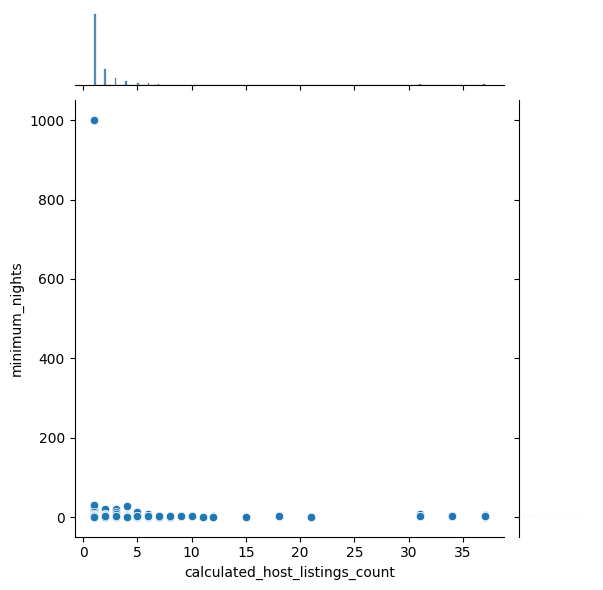

In [32]:
sns.jointplot(x='calculated_host_listings_count', y='minimum_nights', data=df, kind='scatter')


The relation between minimum nights, calculated host listings count and room type


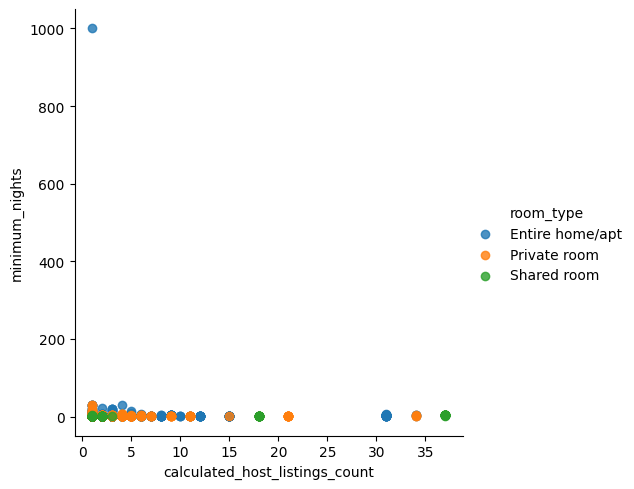

In [33]:
sns.lmplot(x='calculated_host_listings_count', y='minimum_nights', data=df, hue='room_type', fit_reg=False)


The relation between minimum nights and availability of room


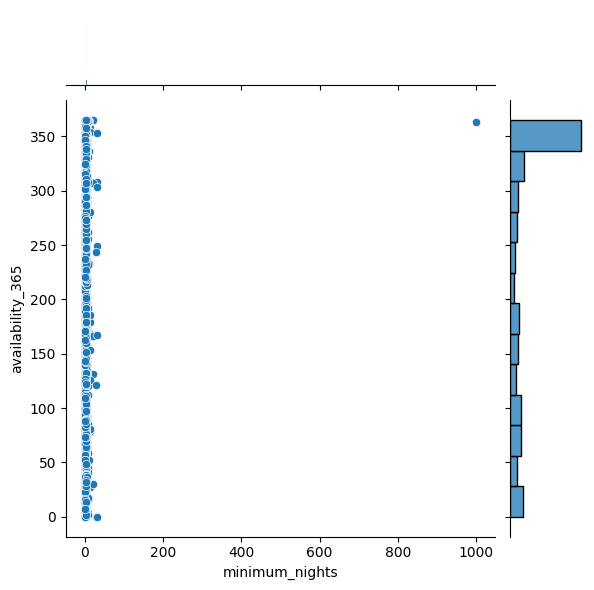

In [34]:
sns.jointplot(x='minimum_nights', y='availability_365', data=df, kind='scatter')


The relation between minimum nights, availability of room and room type


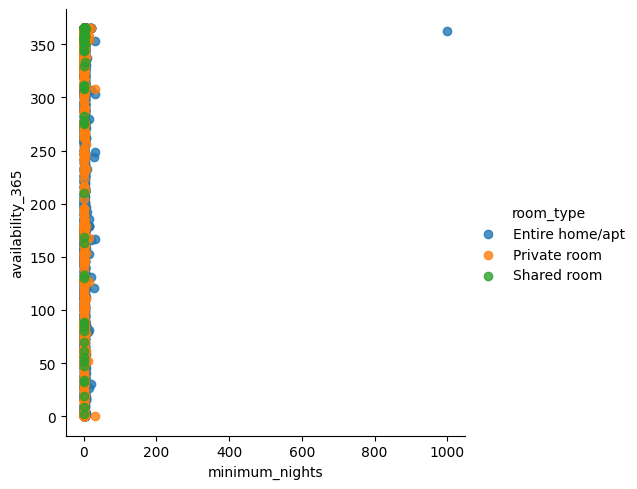

In [35]:
sns.lmplot(x='minimum_nights', y='availability_365', data=df, hue='room_type', fit_reg=False)
